In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('/Users/parkjs9416/Documents/MSc Data Analytics/CS989 BD fundamentals/research BD fundamental datasets/Quarterback stats/QBStats_all.csv')

In [4]:
df

,qb,att,cmp,yds,ypa,td,int,lg,sack,loss,rate,game_points,home_away,year
0,Boomer EsiasonB. Esiason,38,25,237.0,6.2,0,0,20,2.0,11.0,82.9,13,away,1996
1,Jim HarbaughJ. Harbaugh,25,16,196.0,7.8,2,1,35t,0.0,0.0,98.1,20,home,1996
2,Paul JustinP. Justin,8,5,53.0,6.6,0,0,30,1.0,11.0,81.8,20,home,1996
3,Jeff GeorgeJ. George,35,16,215.0,6.1,0,0,55,7.0,53.0,65.8,6,away,1996
4,Kerry CollinsK. Collins,31,17,198.0,6.4,2,0,30,4.0,12.0,95.9,29,home,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13183,Alex SmithA. Smith,28,21,264.0,9.4,2,1,42,1.0,2.0,112.8,37,away,2016
13184,Philip RiversP. Rivers,38,22,269.0,7.1,2,2,23,0.0,0.0,75.4,27,home,2016
13185,Russell WilsonR. Wilson,32,19,258.0,8.1,1,0,42,1.0,6.0,95.6,25,away,2016
13186,Trevone BoykinT. Boykin,6,4,42.0,7.0,0,0,19,1.0,5.0,86.8,25,away,2016


In [5]:
df = df[df.year>2003]
df
#I deleted all the data from 1996 to 2003 to see the data from 2004

,qb,att,cmp,yds,ypa,td,int,lg,sack,loss,rate,game_points,home_away,year
5097,Peyton ManningP. Manning,29,16,256.0,8.8,2,1,64,1.0,12.0,93.5,24,away,2004
5098,Tom BradyT. Brady,38,26,335.0,8.8,3,1,29,2.0,15.0,111.2,27,home,2004
5099,Matt HasselbeckM. Hasselbeck,29,19,246.0,8.5,1,1,38,0.0,0.0,89.2,21,away,2004
5100,Aaron BrooksA. Brooks,37,18,223.0,6.0,1,1,33,2.0,16.0,65.5,7,home,2004
5101,Carson PalmerC. Palmer,27,18,248.0,9.2,2,1,53t,1.0,10.0,105.2,24,away,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13183,Alex SmithA. Smith,28,21,264.0,9.4,2,1,42,1.0,2.0,112.8,37,away,2016
13184,Philip RiversP. Rivers,38,22,269.0,7.1,2,2,23,0.0,0.0,75.4,27,home,2016
13185,Russell WilsonR. Wilson,32,19,258.0,8.1,1,0,42,1.0,6.0,95.6,25,away,2016
13186,Trevone BoykinT. Boykin,6,4,42.0,7.0,0,0,19,1.0,5.0,86.8,25,away,2016


In [6]:
df.to_csv('/Users/parkjs9416/Documents/MSc Data Analytics/CS989 BD fundamentals/research BD fundamental datasets/Quarterback stats/QBstat_from_2004.csv',index = None)
#saved new data frame into new csv file

In [51]:
df = df.drop('qb', axis = 1)
df = df.drop('lg', axis = 1)
df = df.drop('game_points', axis = 1)
df = df.drop('home_away', axis = 1)
df = df.drop('int', axis = 1)
df.columns

Index(['att', 'cmp', 'yds', 'ypa', 'td', 'sack', 'loss', 'rate', 'year'], dtype='object')

In [8]:
df1_qb = df.groupby('qb').sum()
df1_qb
#calculated whole stats of each Quarterbacks

,att,cmp,yds,ypa,td,sack,loss,rate,game_points,year
qb,,,,,,,,,,
A.J. FeeleyA. Feeley,594,329,3464.0,113.5,20,37.0,228.0,1316.5,350,40121
A.J. McCarronA. McCarron,119,79,854.0,38.8,6,12.0,63.0,561.1,153,12090
Aaron BrooksA. Brooks,1165,659,7797.0,242.7,37,100.0,599.0,2650.9,602,72171
Aaron RodgersA. Rodgers,4657,3034,36827.0,1119.8,297,341.0,2163.0,14547.7,3865,283652
Ace SandersA. Sanders,1,1,21.0,21.0,1,0.0,0.0,158.3,27,2013
...,...,...,...,...,...,...,...,...,...,...
Vinny TestaverdeV. Testaverde,776,453,5290.0,202.2,24,55.0,330.0,2151.1,524,58142
Wali LundyW. Lundy,0,0,0.0,0.0,0,1.0,9.0,0.0,13,2006
Willie ParkerW. Parker,1,0,0.0,0.0,0,0.0,0.0,39.6,31,2007


In [9]:
df1_qb.to_csv('/Users/parkjs9416/Documents/MSc Data Analytics/CS989 BD fundamentals/research BD fundamental datasets/Quarterback stats/totalstat_from_2004.csv',index = None)


In [8]:
df1_qb.tail(20)

,att,cmp,yds,ypa,td,sack,loss,rate,game_points,year
qb,,,,,,,,,,
Tony PikeT. Pike,12,6,47.0,3.9,0,1.0,10.0,60.1,3,2010
Tony RomoT. Romo,4244,2777,33695.0,1027.3,243,246.0,1658.0,12606.2,3217,255312
Travaris CadetT. Cadet,1,0,0.0,0.0,0,0.0,0.0,39.6,20,2015
Travis BenjaminT. Benjamin,1,0,0.0,0.0,0,0.0,0.0,39.6,33,2016
Trent DilferT. Dilfer,610,337,3820.0,128.6,19,54.0,342.0,1444.0,357,44120
Trent EdwardsT. Edwards,929,563,6033.0,235.6,26,69.0,482.0,2795.5,635,74306
Trent GreenT. Green,1474,930,11459.0,371.5,56,101.0,669.0,4073.6,1151,96251
Tress WayT. Way,1,1,31.0,31.0,0,0.0,0.0,118.8,29,2016
Trevone BoykinT. Boykin,18,13,145.0,26.9,1,1.0,5.0,290.7,102,6048


In [11]:
d = {'att':'Total_att','cmp':'Total_cmp','yds':'Total_yds','ypa':'AVG_ypa','sack':'Total_sack','td':'Total_td','rate':'AVG_rate'}
df1=df.groupby('qb').agg({'att':'sum','cmp':'sum','yds':'sum','ypa':'mean','sack':'sum','td':'sum','rate':'mean'}).rename(columns=d)
df1

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate
qb,,,,,,,
A.J. FeeleyA. Feeley,594,329,3464.0,5.675000,37.0,20,65.825000
A.J. McCarronA. McCarron,119,79,854.0,6.466667,12.0,6,93.516667
Aaron BrooksA. Brooks,1165,659,7797.0,6.741667,100.0,37,73.636111
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177
Ace SandersA. Sanders,1,1,21.0,21.000000,0.0,1,158.300000
...,...,...,...,...,...,...,...
Vinny TestaverdeV. Testaverde,776,453,5290.0,6.972414,55.0,24,74.175862
Wali LundyW. Lundy,0,0,0.0,0.000000,1.0,0,0.000000
Willie ParkerW. Parker,1,0,0.0,0.000000,0.0,0,39.600000


In [13]:
df1.sort_values(by=['Total_yds'], ascending=False).head(25)
#for the analysis of Total passing yards, data is sorted in the order of Total yds

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate
qb,,,,,,,
Drew BreesD. Brees,7808,5268,60306.0,7.870588,310.0,436,100.105882
Tom BradyT. Brady,6680,4289,51349.0,7.761905,313.0,387,100.124339
Eli ManningE. Manning,6787,4047,47884.0,7.082412,328.0,318,83.754774
Ben RoethlisbergerB. Roethlisberger,5932,3804,46814.0,8.075676,456.0,301,94.918919
Peyton ManningP. Manning,5967,3979,46767.0,7.968639,177.0,369,101.233136
Philip RiversP. Rivers,5917,3811,45833.0,7.903371,362.0,314,96.632584
Carson PalmerC. Palmer,6040,3777,44269.0,7.414857,318.0,285,88.306857
Matt RyanM. Ryan,5064,3288,37701.0,7.634507,255.0,240,95.683803
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177


In [15]:
df1["QB_pass_cmp_rate"] = (
    df1["Total_cmp"] / df1["Total_att"] 
) * 100
df1

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,QB_pass_cmp_rate
qb,,,,,,,,
A.J. FeeleyA. Feeley,594,329,3464.0,5.675000,37.0,20,65.825000,55.387205
A.J. McCarronA. McCarron,119,79,854.0,6.466667,12.0,6,93.516667,66.386555
Aaron BrooksA. Brooks,1165,659,7797.0,6.741667,100.0,37,73.636111,56.566524
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238
Ace SandersA. Sanders,1,1,21.0,21.000000,0.0,1,158.300000,100.000000
...,...,...,...,...,...,...,...,...
Vinny TestaverdeV. Testaverde,776,453,5290.0,6.972414,55.0,24,74.175862,58.376289
Wali LundyW. Lundy,0,0,0.0,0.000000,1.0,0,0.000000,NaN
Willie ParkerW. Parker,1,0,0.0,0.000000,0.0,0,39.600000,0.000000


In [16]:
df1.isnull().sum()

Total_att            0
Total_cmp            0
Total_yds            0
AVG_ypa              0
Total_sack           0
Total_td             0
AVG_rate            11
QB_pass_cmp_rate    10
dtype: int64

In [17]:
df1.fillna(0)

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,QB_pass_cmp_rate
qb,,,,,,,,
A.J. FeeleyA. Feeley,594,329,3464.0,5.675000,37.0,20,65.825000,55.387205
A.J. McCarronA. McCarron,119,79,854.0,6.466667,12.0,6,93.516667,66.386555
Aaron BrooksA. Brooks,1165,659,7797.0,6.741667,100.0,37,73.636111,56.566524
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238
Ace SandersA. Sanders,1,1,21.0,21.000000,0.0,1,158.300000,100.000000
...,...,...,...,...,...,...,...,...
Vinny TestaverdeV. Testaverde,776,453,5290.0,6.972414,55.0,24,74.175862,58.376289
Wali LundyW. Lundy,0,0,0.0,0.000000,1.0,0,0.000000,0.000000
Willie ParkerW. Parker,1,0,0.0,0.000000,0.0,0,39.600000,0.000000


In [18]:
df1.to_csv('/Users/parkjs9416/Documents/MSc Data Analytics/CS989 BD fundamentals/research BD fundamental datasets/Quarterback stats/totalstat_from_2004.csv',index = None)

In [20]:
df1.sort_values(by=['Total_yds'], ascending=False).head(25)

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,QB_pass_cmp_rate
qb,,,,,,,,
Drew BreesD. Brees,7808,5268,60306.0,7.870588,310.0,436,100.105882,67.469262
Tom BradyT. Brady,6680,4289,51349.0,7.761905,313.0,387,100.124339,64.206587
Eli ManningE. Manning,6787,4047,47884.0,7.082412,328.0,318,83.754774,59.628702
Ben RoethlisbergerB. Roethlisberger,5932,3804,46814.0,8.075676,456.0,301,94.918919,64.126770
Peyton ManningP. Manning,5967,3979,46767.0,7.968639,177.0,369,101.233136,66.683426
Philip RiversP. Rivers,5917,3811,45833.0,7.903371,362.0,314,96.632584,64.407639
Carson PalmerC. Palmer,6040,3777,44269.0,7.414857,318.0,285,88.306857,62.533113
Matt RyanM. Ryan,5064,3288,37701.0,7.634507,255.0,240,95.683803,64.928910
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238


<AxesSubplot:xlabel='AVG_rate', ylabel='QB_pass_cmp_rate'>

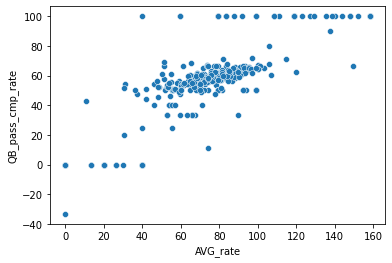

In [22]:
sns.scatterplot(data = df1 , x="AVG_rate", y='QB_pass_cmp_rate')

<AxesSubplot:xlabel='QB pass cmp rate', ylabel='Average rate'>

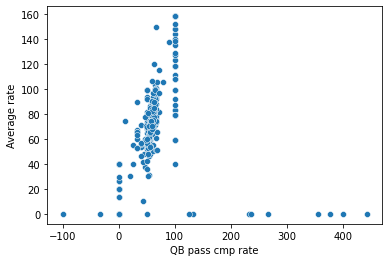

In [16]:
sns.scatterplot(data = df2 , x="QB pass cmp rate", y='Average rate')

In [24]:
df2 = df1.sort_values(by=['Total_yds'], ascending=False).head(25)
df2

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,QB_pass_cmp_rate
qb,,,,,,,,
Drew BreesD. Brees,7808,5268,60306.0,7.870588,310.0,436,100.105882,67.469262
Tom BradyT. Brady,6680,4289,51349.0,7.761905,313.0,387,100.124339,64.206587
Eli ManningE. Manning,6787,4047,47884.0,7.082412,328.0,318,83.754774,59.628702
Ben RoethlisbergerB. Roethlisberger,5932,3804,46814.0,8.075676,456.0,301,94.918919,64.126770
Peyton ManningP. Manning,5967,3979,46767.0,7.968639,177.0,369,101.233136,66.683426
Philip RiversP. Rivers,5917,3811,45833.0,7.903371,362.0,314,96.632584,64.407639
Carson PalmerC. Palmer,6040,3777,44269.0,7.414857,318.0,285,88.306857,62.533113
Matt RyanM. Ryan,5064,3288,37701.0,7.634507,255.0,240,95.683803,64.928910
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238


<AxesSubplot:xlabel='QB_pass_cmp_rate', ylabel='AVG_rate'>

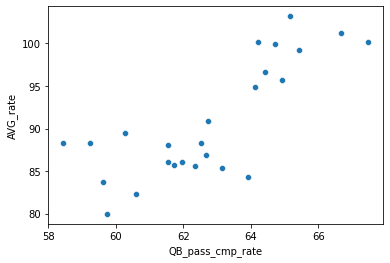

In [25]:
sns.scatterplot(data = df2 , x="QB_pass_cmp_rate", y='AVG_rate')

In [28]:
df2['qb'] = df2.index #added the column 'qb' groupby함수에서 쓰여갖고 인식을 못해서 그냥 새로 추가함 
df2.head(25)

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,QB_pass_cmp_rate,qb
qb,,,,,,,,,
Drew BreesD. Brees,7808,5268,60306.0,7.870588,310.0,436,100.105882,67.469262,Drew BreesD. Brees
Tom BradyT. Brady,6680,4289,51349.0,7.761905,313.0,387,100.124339,64.206587,Tom BradyT. Brady
Eli ManningE. Manning,6787,4047,47884.0,7.082412,328.0,318,83.754774,59.628702,Eli ManningE. Manning
Ben RoethlisbergerB. Roethlisberger,5932,3804,46814.0,8.075676,456.0,301,94.918919,64.126770,Ben RoethlisbergerB. Roethlisberger
Peyton ManningP. Manning,5967,3979,46767.0,7.968639,177.0,369,101.233136,66.683426,Peyton ManningP. Manning
Philip RiversP. Rivers,5917,3811,45833.0,7.903371,362.0,314,96.632584,64.407639,Philip RiversP. Rivers
Carson PalmerC. Palmer,6040,3777,44269.0,7.414857,318.0,285,88.306857,62.533113,Carson PalmerC. Palmer
Matt RyanM. Ryan,5064,3288,37701.0,7.634507,255.0,240,95.683803,64.928910,Matt RyanM. Ryan
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238,Aaron RodgersA. Rodgers


In [29]:
df2.to_csv('/Users/parkjs9416/Documents/MSc Data Analytics/CS989 BD fundamentals/research BD fundamental datasets/Quarterback stats/QBstat_from_20041.csv',index = None)

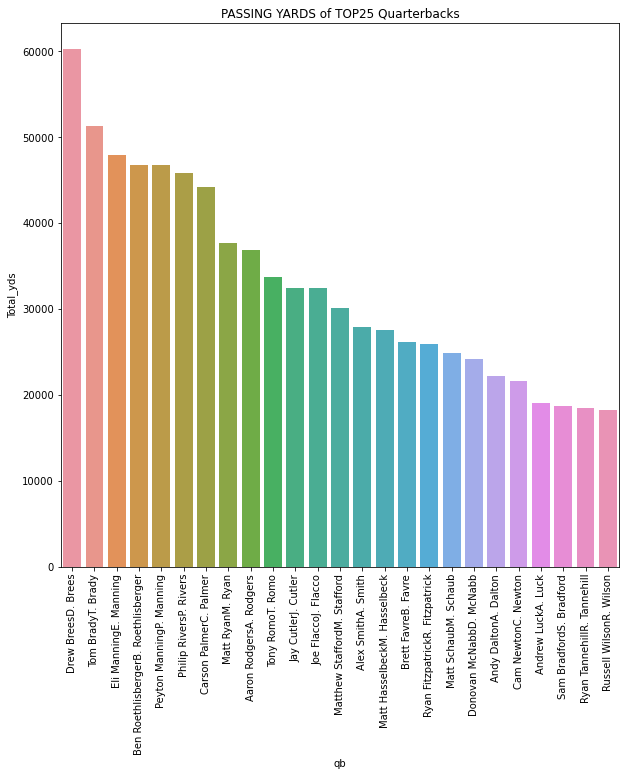

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(x='qb', y='Total_yds', data=df2) 
plt.title("PASSING YARDS of TOP25 Quarterbacks") #title
plt.xticks(rotation=90)
plt.show()

In [34]:
df3 = df2.sort_values(by=['Total_td'], ascending=False).head(25) 
df3

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,QB_pass_cmp_rate,qb
qb,,,,,,,,,
Drew BreesD. Brees,7808,5268,60306.0,7.870588,310.0,436,100.105882,67.469262,Drew BreesD. Brees
Tom BradyT. Brady,6680,4289,51349.0,7.761905,313.0,387,100.124339,64.206587,Tom BradyT. Brady
Peyton ManningP. Manning,5967,3979,46767.0,7.968639,177.0,369,101.233136,66.683426,Peyton ManningP. Manning
Eli ManningE. Manning,6787,4047,47884.0,7.082412,328.0,318,83.754774,59.628702,Eli ManningE. Manning
Philip RiversP. Rivers,5917,3811,45833.0,7.903371,362.0,314,96.632584,64.407639,Philip RiversP. Rivers
Ben RoethlisbergerB. Roethlisberger,5932,3804,46814.0,8.075676,456.0,301,94.918919,64.126770,Ben RoethlisbergerB. Roethlisberger
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238,Aaron RodgersA. Rodgers
Carson PalmerC. Palmer,6040,3777,44269.0,7.414857,318.0,285,88.306857,62.533113,Carson PalmerC. Palmer
Tony RomoT. Romo,4244,2777,33695.0,8.088976,246.0,243,99.261417,65.433553,Tony RomoT. Romo


In [36]:
df3.columns

Index(['Total_att', 'Total_cmp', 'Total_yds', 'AVG_ypa', 'Total_sack',
       'Total_td', 'AVG_rate', 'QB_pass_cmp_rate', 'qb'],
      dtype='object')

In [37]:
df3 = df3[['qb', 'Total_att', 'Total_cmp', 'Total_yds', 'AVG_ypa', 'Total_sack',
       'Total_td', 'AVG_rate', 'QB_pass_cmp_rate']]
df3

,qb,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,QB_pass_cmp_rate
qb,,,,,,,,,
Drew BreesD. Brees,Drew BreesD. Brees,7808,5268,60306.0,7.870588,310.0,436,100.105882,67.469262
Tom BradyT. Brady,Tom BradyT. Brady,6680,4289,51349.0,7.761905,313.0,387,100.124339,64.206587
Peyton ManningP. Manning,Peyton ManningP. Manning,5967,3979,46767.0,7.968639,177.0,369,101.233136,66.683426
Eli ManningE. Manning,Eli ManningE. Manning,6787,4047,47884.0,7.082412,328.0,318,83.754774,59.628702
Philip RiversP. Rivers,Philip RiversP. Rivers,5917,3811,45833.0,7.903371,362.0,314,96.632584,64.407639
Ben RoethlisbergerB. Roethlisberger,Ben RoethlisbergerB. Roethlisberger,5932,3804,46814.0,8.075676,456.0,301,94.918919,64.126770
Aaron RodgersA. Rodgers,Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238
Carson PalmerC. Palmer,Carson PalmerC. Palmer,6040,3777,44269.0,7.414857,318.0,285,88.306857,62.533113
Tony RomoT. Romo,Tony RomoT. Romo,4244,2777,33695.0,8.088976,246.0,243,99.261417,65.433553


In [38]:
df3.to_csv('/Users/parkjs9416/Documents/MSc Data Analytics/CS989 BD fundamentals/research BD fundamental datasets/Quarterback stats/QBstat_from_20041.csv',index = None)

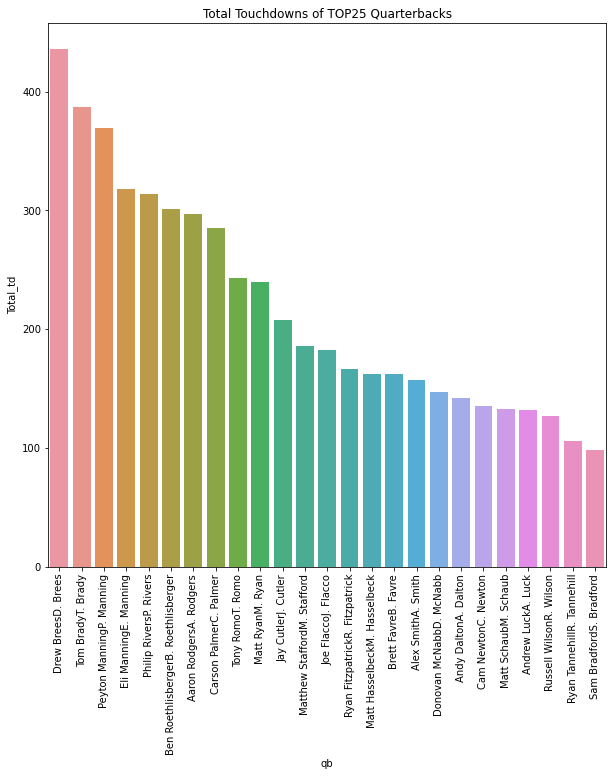

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(x='qb', y='Total_td', data=df3) 
plt.title("Total Touchdowns of TOP25 Quarterbacks") #title
plt.xticks(rotation=90)
plt.show()

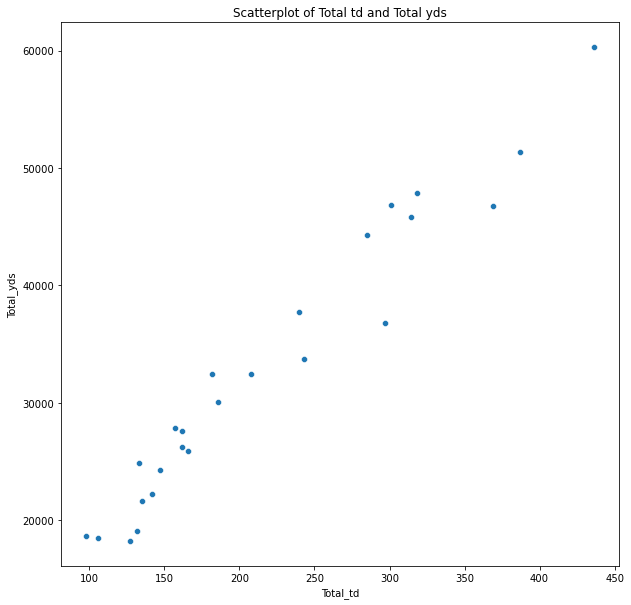

In [41]:
plt.figure(figsize=(10,10))
plt.title("Scatterplot of Total td and Total yds") #title
sns.scatterplot(data = df3, x = "Total_td", y = "Total_yds")
plt.show()

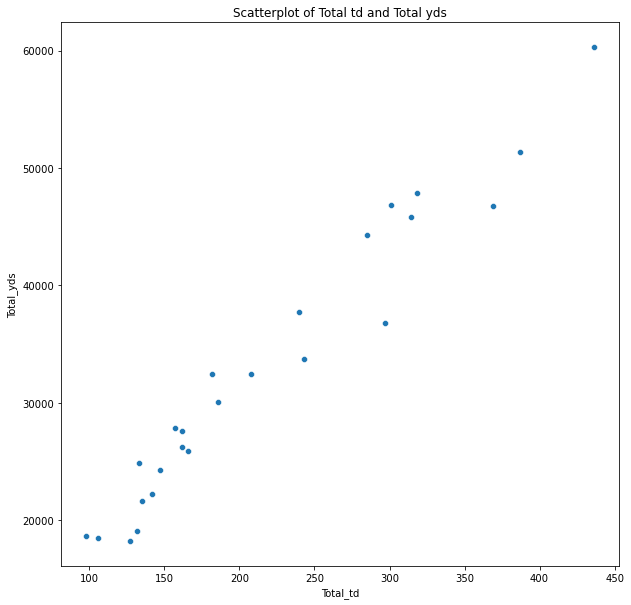

In [42]:
plt.figure(figsize=(10,10))
plt.title("Scatterplot of Total td and Total yds") #title
sns.scatterplot(data = df3, x = "Total_td", y = "Total_yds")
plt.show()

KeyError: 'Total_td'

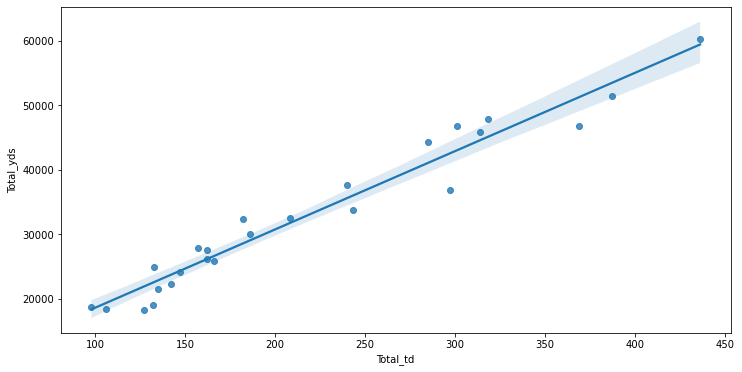

In [43]:
plt.rcParams["figure.figsize"] = (12, 6)
sns.regplot(x='Total_td', y='Total_yds', data=df3)
plt.xlim(df["Total_td"].min()-1, df["Total_td"].max()+1)
plt.grid()
plt.show()

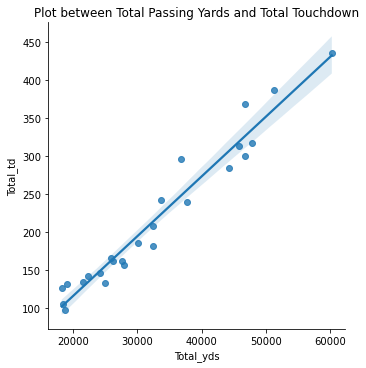

In [44]:
ax = sns.lmplot(x = "Total_yds", y= "Total_td", data = df3)
plt.title("Plot between Total Passing Yards and Total Touchdown")
ax

In [46]:
df4 =df3.sort_values(by=['Total_yds','QB_pass_cmp_rate'], ascending=[False, True])
df4

,qb,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,QB_pass_cmp_rate
qb,,,,,,,,,
Drew BreesD. Brees,Drew BreesD. Brees,7808,5268,60306.0,7.870588,310.0,436,100.105882,67.469262
Tom BradyT. Brady,Tom BradyT. Brady,6680,4289,51349.0,7.761905,313.0,387,100.124339,64.206587
Eli ManningE. Manning,Eli ManningE. Manning,6787,4047,47884.0,7.082412,328.0,318,83.754774,59.628702
Ben RoethlisbergerB. Roethlisberger,Ben RoethlisbergerB. Roethlisberger,5932,3804,46814.0,8.075676,456.0,301,94.918919,64.126770
Peyton ManningP. Manning,Peyton ManningP. Manning,5967,3979,46767.0,7.968639,177.0,369,101.233136,66.683426
Philip RiversP. Rivers,Philip RiversP. Rivers,5917,3811,45833.0,7.903371,362.0,314,96.632584,64.407639
Carson PalmerC. Palmer,Carson PalmerC. Palmer,6040,3777,44269.0,7.414857,318.0,285,88.306857,62.533113
Matt RyanM. Ryan,Matt RyanM. Ryan,5064,3288,37701.0,7.634507,255.0,240,95.683803,64.928910
Aaron RodgersA. Rodgers,Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238


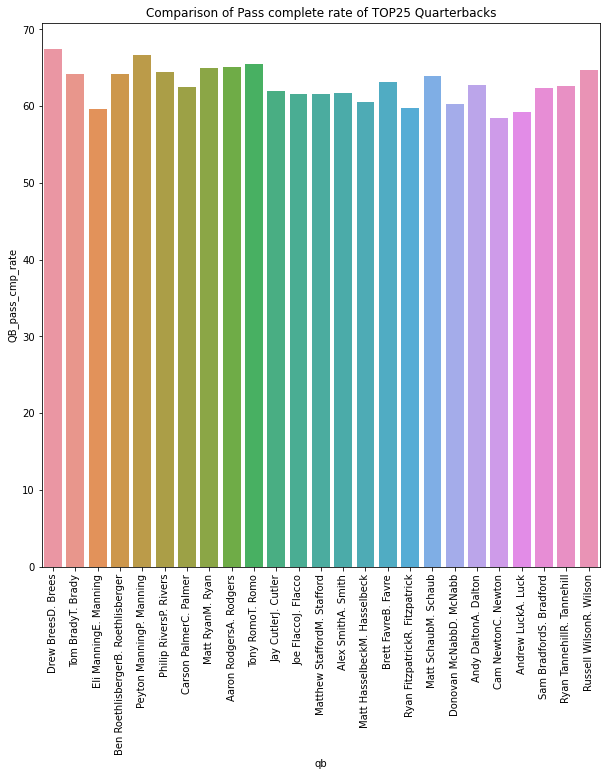

In [47]:
plt.figure(figsize=(10,10))
sns.barplot(x='qb', y='QB_pass_cmp_rate', data=df4) 
plt.title("Comparison of Pass complete rate of TOP25 Quarterbacks")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df2.sort_values(by=['Total td'], ascending=[False]).head(25)

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='qb', y='Total td', data=df2.sort_values(by=['Total td'], ascending=[False]).head(25), color = 'Blue') 
plt.title("Total Touch down of TOP25 Quarterbacks") 
plt.xticks(rotation=90)
plt.show()

In [ ]:
df3 = df3.sort_values(by=['QB pass cmp rate'], ascending=False)
df3

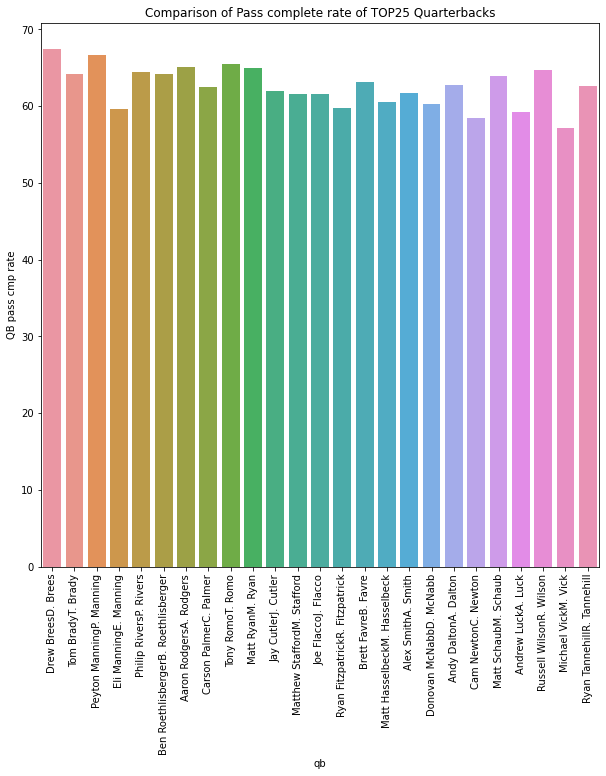

In [27]:
plt.figure(figsize=(10,10))
sns.barplot(x='qb', y='QB pass cmp rate', data=df3) 
plt.title("Comparison of Pass complete rate of TOP25 Quarterbacks")
plt.xticks(rotation=90)
plt.show()

In [28]:
df1.head(10)

,qb,att,cmp,yds,ypa,td,int,lg,sack,loss,rate,game_points,home_away,year
5097,Peyton ManningP. Manning,29,16,256.0,8.8,2,1,64,1.0,12.0,93.5,24,away,2004
5098,Tom BradyT. Brady,38,26,335.0,8.8,3,1,29,2.0,15.0,111.2,27,home,2004
5099,Matt HasselbeckM. Hasselbeck,29,19,246.0,8.5,1,1,38,0.0,0.0,89.2,21,away,2004
5100,Aaron BrooksA. Brooks,37,18,223.0,6.0,1,1,33,2.0,16.0,65.5,7,home,2004
5101,Carson PalmerC. Palmer,27,18,248.0,9.2,2,1,53t,1.0,10.0,105.2,24,away,2004
5102,Chad PenningtonC. Pennington,27,20,224.0,8.3,2,0,46t,1.0,5.0,123.1,31,home,2004
5103,Josh McCownJ. McCown,29,18,181.0,6.2,0,0,37,2.0,24.0,79.8,10,away,2004
5104,Marc BulgerM. Bulger,34,23,272.0,8.0,1,1,36,0.0,0.0,89.3,17,home,2004
5105,Steve McNairS. McNair,14,9,73.0,5.2,1,0,19,2.0,12.0,101.2,17,away,2004
5106,A.J. FeeleyA. Feeley,31,21,168.0,5.4,1,1,19,2.0,11.0,78.4,7,home,2004


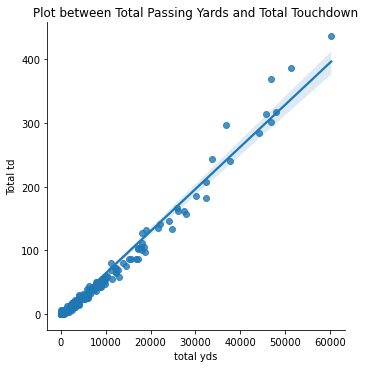

In [29]:
ax = sns.lmplot(x = "total yds", y= "Total td", data = df2)
plt.title("Plot between Total Passing Yards and Total Touchdown")
ax

In [30]:
df2.corr(method = 'pearson')

,Total att,Total cmp,total yds,AVG ypa,Total sack,Total td,Average rate,QB pass cmp rate
Total att,1.000000,0.998646,0.997611,0.028783,0.956185,0.982299,0.208949,0.076118
Total cmp,0.998646,1.000000,0.999071,0.030786,0.948649,0.987912,0.207833,0.080935
total yds,0.997611,0.999071,1.000000,0.031863,0.947971,0.991134,0.209983,0.074334
AVG ypa,0.028783,0.030786,0.031863,1.000000,0.025764,0.034076,0.679971,0.503206
Total sack,0.956185,0.948649,0.947971,0.025764,1.000000,0.913122,0.212621,0.078484
Total td,0.982299,0.987912,0.991134,0.034076,0.913122,1.000000,0.206576,0.071368
Average rate,0.208949,0.207833,0.209983,0.679971,0.212621,0.206576,1.000000,0.373814
QB pass cmp rate,0.076118,0.080935,0.074334,0.503206,0.078484,0.071368,0.373814,1.000000


<AxesSubplot:>

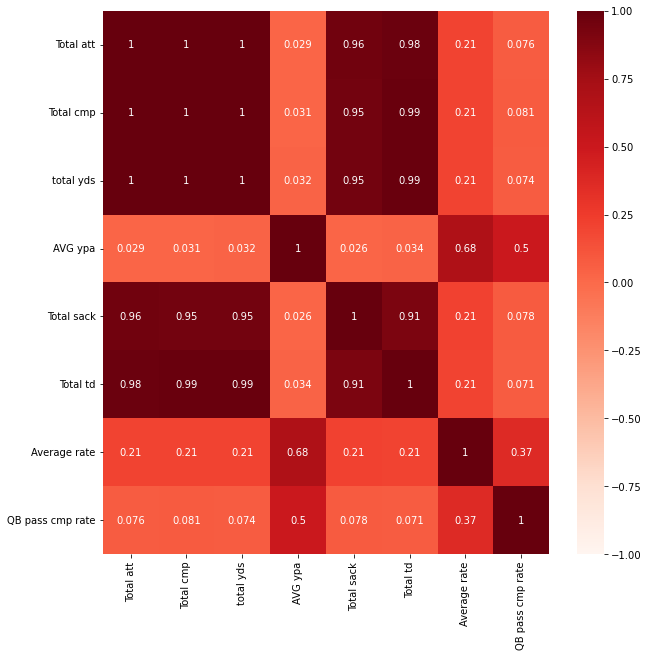

In [31]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(df2.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [151]:
df3['Average rate'].head(25)

qb
Drew BreesD. Brees                     100.105882
Peyton ManningP. Manning               101.233136
Tony RomoT. Romo                        99.261417
Aaron RodgersA. Rodgers                103.175177
Matt RyanM. Ryan                        95.683803
Russell WilsonR. Wilson                 99.928750
Philip RiversP. Rivers                  96.632584
Tom BradyT. Brady                      100.124339
Ben RoethlisbergerB. Roethlisberger     94.918919
Matt SchaubM. Schaub                    84.332727
Brett FavreB. Favre                     85.384404
Andy DaltonA. Dalton                    90.896774
Ryan TannehillR. Tannehill              86.914286
Carson PalmerC. Palmer                  88.306857
Jay CutlerJ. Cutler                     86.087770
Alex SmithA. Smith                      85.716312
Joe FlaccoJ. Flacco                     86.124818
Matthew StaffordM. Stafford             88.101852
Matt HasselbeckM. Hasselbeck            82.276336
Donovan McNabbD. McNabb                 89.4659

In [33]:
#rating ascending sorting
df3 = df3.sort_values(by=['Average rate'], ascending=False).head(25)
df3

,Total att,Total cmp,total yds,AVG ypa,Total sack,Total td,Average rate,QB pass cmp rate,qb
qb,,,,,,,,,
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,65.149238,Aaron RodgersA. Rodgers
Peyton ManningP. Manning,5967,3979,46767.0,7.968639,177.0,369,101.233136,66.683426,Peyton ManningP. Manning
Tom BradyT. Brady,6680,4289,51349.0,7.761905,313.0,387,100.124339,64.206587,Tom BradyT. Brady
Drew BreesD. Brees,7808,5268,60306.0,7.870588,310.0,436,100.105882,67.469262,Drew BreesD. Brees
Russell WilsonR. Wilson,2281,1476,18193.0,8.146250,205.0,127,99.928750,64.708461,Russell WilsonR. Wilson
Tony RomoT. Romo,4244,2777,33695.0,8.088976,246.0,243,99.261417,65.433553,Tony RomoT. Romo
Philip RiversP. Rivers,5917,3811,45833.0,7.903371,362.0,314,96.632584,64.407639,Philip RiversP. Rivers
Matt RyanM. Ryan,5064,3288,37701.0,7.634507,255.0,240,95.683803,64.928910,Matt RyanM. Ryan
Ben RoethlisbergerB. Roethlisberger,5932,3804,46814.0,8.075676,456.0,301,94.918919,64.126770,Ben RoethlisbergerB. Roethlisberger


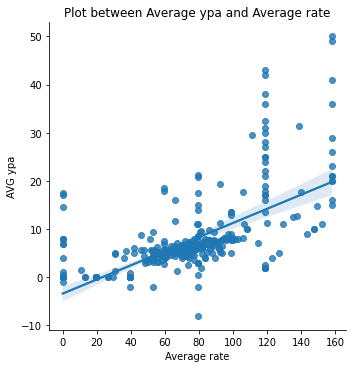

In [63]:
ax = sns.lmplot(x = "Average rate", y= "AVG ypa", data = df2)
plt.title("Plot between Average ypa and Average rate")
ax

<AxesSubplot:>

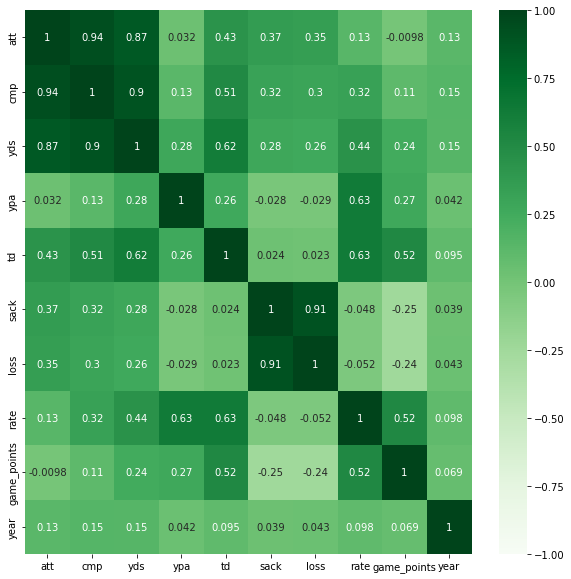

In [78]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(df1.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [179]:
scale(df2)

array([[ 8.92809725e-02,  3.84714056e-02, -3.94496615e-04, ...,
        -1.80123368e-02, -5.59689000e-02,  3.42874614e-02],
       [-3.28744117e-01, -3.10989968e-01, -3.12378503e-01, ...,
        -2.69083861e-01,  7.23295798e-01,  2.56875299e-01],
       [ 5.91791132e-01,  4.99760419e-01,  5.17546768e-01, ...,
         2.86860228e-01,  1.63841746e-01,  5.81526816e-02],
       ...,
       [-4.32590349e-01, -4.21419763e-01, -4.14460626e-01, ...,
        -3.76685942e-01, -7.93960475e-01, -1.08655324e+00],
       [-4.32590349e-01, -4.20021917e-01, -4.08483921e-01, ...,
        -3.58752262e-01,  2.54634839e+00,  9.37092278e-01],
       [-1.29852179e-01, -1.30667899e-01, -1.33914089e-01, ...,
        -1.61481779e-01,  7.88361901e-02,  1.33499712e-01]])

In [197]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, A.J. FeeleyA. Feeley to Zach MettenbergerZ. Mettenberger
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Total_att         456 non-null    object 
 1   Total_cmp         456 non-null    object 
 2   Total_yds         456 non-null    float64
 3   AVG_ypa           456 non-null    float64
 4   Total_sack        456 non-null    float64
 5   Total_td          456 non-null    object 
 6   AVG_rate          456 non-null    float64
 7   QB_pass_cmp_rate  446 non-null    float64
dtypes: float64(5), object(3)
memory usage: 32.1+ KB


In [205]:
df2 = df2.astype({'Total_td': 'object'})
df2 = df2.astype({'Total_att': 'object'})
df2 = df2.astype({'Total_cmp':'object'})

In [206]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, A.J. FeeleyA. Feeley to Zach MettenbergerZ. Mettenberger
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Total_att   456 non-null    object 
 1   Total_cmp   456 non-null    object 
 2   Total_yds   456 non-null    float64
 3   AVG_ypa     456 non-null    float64
 4   Total_sack  456 non-null    float64
 5   Total_td    456 non-null    object 
 6   AVG_rate    456 non-null    float64
dtypes: float64(4), object(3)
memory usage: 28.5+ KB


In [211]:
df_f = df2.copy()
df_f.fillna(0)

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate
qb,,,,,,,
A.J. FeeleyA. Feeley,594,329,3464.0,5.675000,37.0,20,65.825000
A.J. McCarronA. McCarron,119,79,854.0,6.466667,12.0,6,93.516667
Aaron BrooksA. Brooks,1165,659,7797.0,6.741667,100.0,37,73.636111
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177
Ace SandersA. Sanders,1,1,21.0,21.000000,0.0,1,158.300000
...,...,...,...,...,...,...,...
Vinny TestaverdeV. Testaverde,776,453,5290.0,6.972414,55.0,24,74.175862
Wali LundyW. Lundy,0,0,0.0,0.000000,1.0,0,0.000000
Willie ParkerW. Parker,1,0,0.0,0.000000,0.0,0,39.600000


In [216]:
col_name = df_f.columns.to_series()[np.isinf(df_f).any() | np.isnan(df_f).any()]

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [200]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df2)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [157]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(df2) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(df2) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

             0            1             2         3           4           5  \
0   132.614610    77.612091    857.279421  6.467111   10.939547    4.546599   
1  2161.152174  1310.760870  15094.608696  7.015372  147.434783   87.108696   
2  5580.153846  3566.692308  42030.538462  7.628734  302.923077  289.692308   

           6  
0  65.132973  
1  83.518098  
2  94.116256  
[0 0 0 2 0 0 0 0 0 0]


In [159]:
clust_df = df2.copy()
clust_df['clust'] = pred
clust_df.head(25)

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,clust
qb,,,,,,,,
A.J. FeeleyA. Feeley,594,329,3464.0,5.675000,37.0,20,65.825000,0
A.J. McCarronA. McCarron,119,79,854.0,6.466667,12.0,6,93.516667,0
Aaron BrooksA. Brooks,1165,659,7797.0,6.741667,100.0,37,73.636111,0
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,2
Ace SandersA. Sanders,1,1,21.0,21.000000,0.0,1,158.300000,0
Adam JonesA. Jones,0,0,0.0,0.000000,1.0,0,0.000000,0
Adam PodleshA. Podlesh,1,0,0.0,0.000000,0.0,0,39.600000,0
Adam VinatieriA. Vinatieri,1,1,4.0,4.000000,0.0,1,122.900000,0
Adimchinobe EchemanduA. Echemandu,1,0,0.0,0.000000,0.0,0,39.600000,0


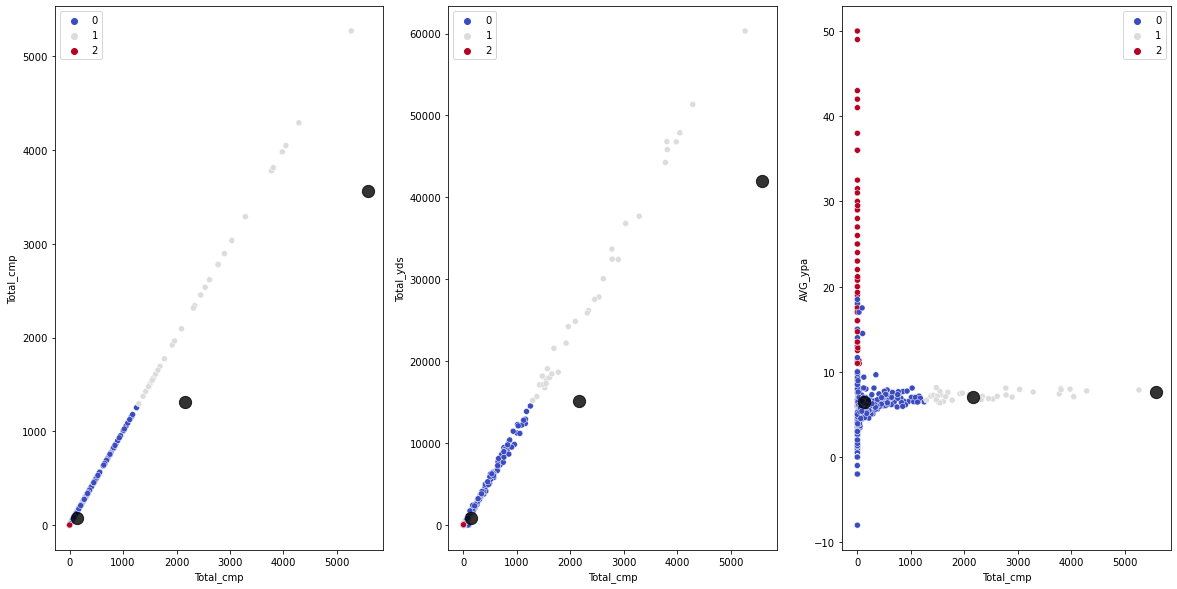

In [170]:
# scaling하지 않은 데이터를 학습하고 시각화하기

plt.figure(figsize=(20, 10))

X = clust_df
plt.subplot(131)
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,1], data=df2, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,2], data=df2, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,3], data=df2, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150)

plt.show()

In [162]:
scale(X)

array([[ 8.92809725e-02,  3.84714056e-02, -3.94496615e-04, ...,
        -1.80123368e-02, -5.59689000e-02, -3.62252974e-01],
       [-3.28744117e-01, -3.10989968e-01, -3.12378503e-01, ...,
        -2.69083861e-01,  7.23295798e-01, -3.62252974e-01],
       [ 5.91791132e-01,  4.99760419e-01,  5.17546768e-01, ...,
         2.86860228e-01,  1.63841746e-01, -3.62252974e-01],
       ...,
       [-4.32590349e-01, -4.21419763e-01, -4.14460626e-01, ...,
        -3.76685942e-01, -7.93960475e-01, -3.62252974e-01],
       [-4.32590349e-01, -4.20021917e-01, -4.08483921e-01, ...,
        -3.58752262e-01,  2.54634839e+00, -3.62252974e-01],
       [-1.29852179e-01, -1.30667899e-01, -1.33914089e-01, ...,
        -1.61481779e-01,  7.88361901e-02, -3.62252974e-01]])

In [196]:
standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(df2.iloc[:,0:7]), columns=df2.iloc[:,0:7].columns)

In [165]:
clust_model.fit(scaled_df)
centers_s = clust_model.cluster_centers_
pred_s = clust_model.predict(scaled_df)

In [166]:
clust_df['clust_s'] = pred_s
clust_df

,Total_att,Total_cmp,Total_yds,AVG_ypa,Total_sack,Total_td,AVG_rate,clust,clust_s
qb,,,,,,,,,
A.J. FeeleyA. Feeley,594,329,3464.0,5.675000,37.0,20,65.825000,0,0
A.J. McCarronA. McCarron,119,79,854.0,6.466667,12.0,6,93.516667,0,0
Aaron BrooksA. Brooks,1165,659,7797.0,6.741667,100.0,37,73.636111,0,0
Aaron RodgersA. Rodgers,4657,3034,36827.0,7.941844,341.0,297,103.175177,2,1
Ace SandersA. Sanders,1,1,21.0,21.000000,0.0,1,158.300000,0,2
...,...,...,...,...,...,...,...,...,...
Vinny TestaverdeV. Testaverde,776,453,5290.0,6.972414,55.0,24,74.175862,0,0
Wali LundyW. Lundy,0,0,0.0,0.000000,1.0,0,0.000000,0,0
Willie ParkerW. Parker,1,0,0.0,0.000000,0.0,0,39.600000,0,0


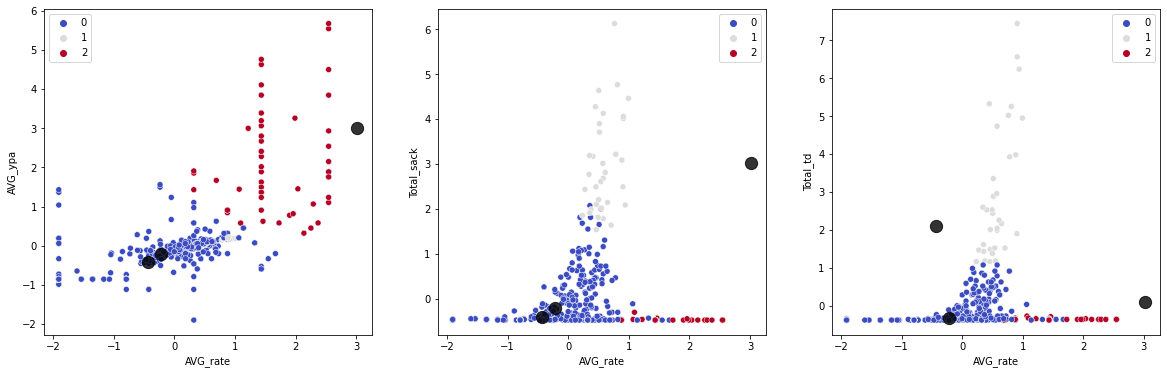

In [175]:
plt.figure(figsize=(20, 6))

X = scaled_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,6], y=X.iloc[:,3], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,6], y=X.iloc[:,4], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,2], c='black', alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,6], y=X.iloc[:,5], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,3], c='black', alpha=0.8, s=150)

plt.show()

In [171]:
pd.crosstab(clust_df['clust'],clust_df['clust_s'])

clust_s,0,1,2
clust,,,
0,343,0,54
1,25,21,0
2,0,13,0


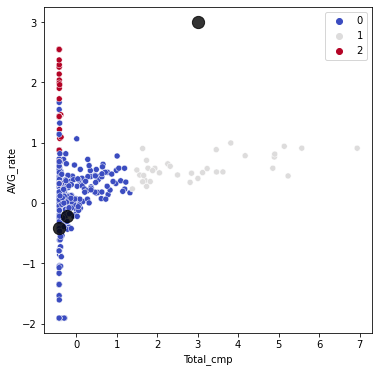

In [215]:
plt.figure(figsize=(20, 6))

X = scaled_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,6], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,1], c='black', alpha=0.8, s=150)


plt.show()

In [218]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8091 entries, 5097 to 13187
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   qb           8091 non-null   object 
 1   att          8091 non-null   int64  
 2   cmp          8091 non-null   int64  
 3   yds          8091 non-null   float64
 4   ypa          8091 non-null   float64
 5   td           8091 non-null   int64  
 6   int          8091 non-null   object 
 7   lg           8074 non-null   object 
 8   sack         8074 non-null   float64
 9   loss         8074 non-null   float64
 10  rate         8074 non-null   float64
 11  game_points  8091 non-null   int64  
 12  home_away    8091 non-null   object 
 13  year         8091 non-null   int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 948.2+ KB


In [219]:
df1 = df1.astype({'att': 'object'})
df1 = df1.astype({'cmp': 'object'})
df1 = df1.astype({'td':'object'})
df1 = df1.astype({'game_points':'object'})
df1 = df1.astype({'year':'object'})

In [220]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8091 entries, 5097 to 13187
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   qb           8091 non-null   object 
 1   att          8091 non-null   object 
 2   cmp          8091 non-null   object 
 3   yds          8091 non-null   float64
 4   ypa          8091 non-null   float64
 5   td           8091 non-null   object 
 6   int          8091 non-null   object 
 7   lg           8074 non-null   object 
 8   sack         8074 non-null   float64
 9   loss         8074 non-null   float64
 10  rate         8074 non-null   float64
 11  game_points  8091 non-null   object 
 12  home_away    8091 non-null   object 
 13  year         8091 non-null   object 
dtypes: float64(5), object(9)
memory usage: 948.2+ KB


In [223]:
df_f1 = df1.copy()
df_f1.fillna(0)

,qb,att,cmp,yds,ypa,td,int,lg,sack,loss,rate,game_points,home_away,year
5097,Peyton ManningP. Manning,29,16,256.0,8.8,2,1,64,1.0,12.0,93.5,24,away,2004
5098,Tom BradyT. Brady,38,26,335.0,8.8,3,1,29,2.0,15.0,111.2,27,home,2004
5099,Matt HasselbeckM. Hasselbeck,29,19,246.0,8.5,1,1,38,0.0,0.0,89.2,21,away,2004
5100,Aaron BrooksA. Brooks,37,18,223.0,6.0,1,1,33,2.0,16.0,65.5,7,home,2004
5101,Carson PalmerC. Palmer,27,18,248.0,9.2,2,1,53t,1.0,10.0,105.2,24,away,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13183,Alex SmithA. Smith,28,21,264.0,9.4,2,1,42,1.0,2.0,112.8,37,away,2016
13184,Philip RiversP. Rivers,38,22,269.0,7.1,2,2,23,0.0,0.0,75.4,27,home,2016
13185,Russell WilsonR. Wilson,32,19,258.0,8.1,1,0,42,1.0,6.0,95.6,25,away,2016
13186,Trevone BoykinT. Boykin,6,4,42.0,7.0,0,0,19,1.0,5.0,86.8,25,away,2016


In [225]:
col_name = df_f1.columns.to_series()[np.isinf(df_f1).any() | np.isnan(df_f1).any()]

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

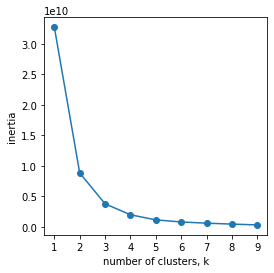

In [226]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df2)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [228]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_f1)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

ValueError: could not convert string to float: 'Peyton ManningP.\xa0Manning'

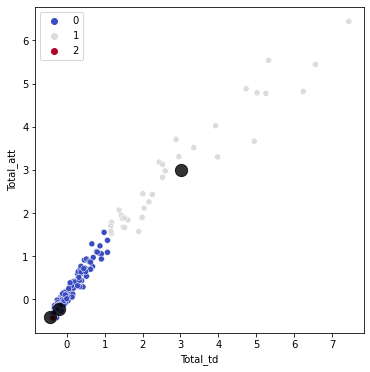

In [231]:
plt.figure(figsize=(20, 6))

X = scaled_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,5], y=X.iloc[:,0], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,1], c='black', alpha=0.8, s=150)


plt.show()

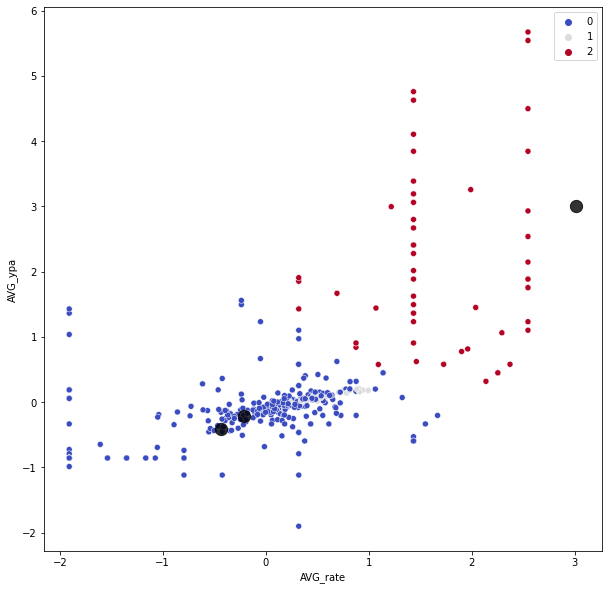

In [237]:
plt.figure(figsize=(10, 10))

X = scaled_df

sns.scatterplot(x=X.iloc[:,6], y=X.iloc[:,3], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,1], c='black', alpha=0.8, s=150)

plt.show()

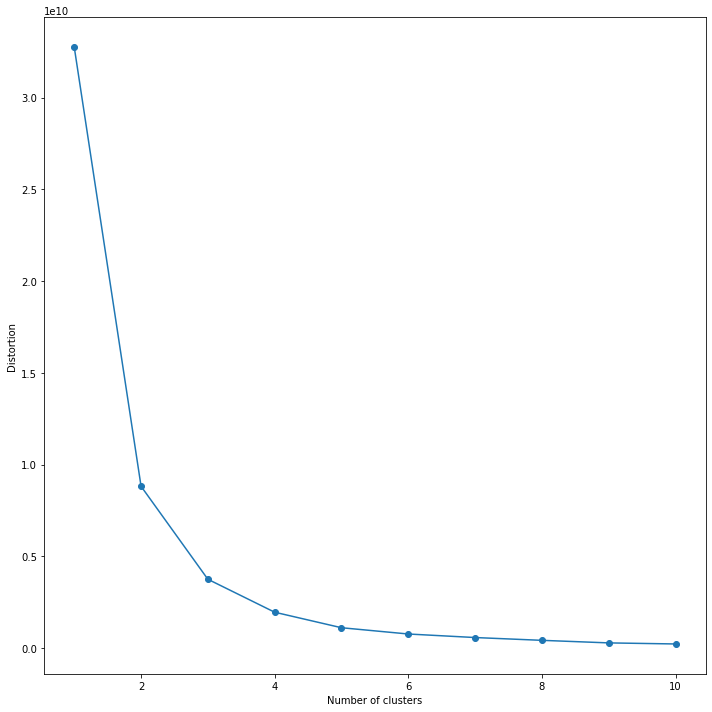

In [238]:
distortions = []

for i in range(1, 11) :
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               random_state = 0)
    km.fit(df2)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [269]:
data = scale(df2)
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
kmeans = cluster.KMeans(n_clusters=n_digits)
kmeans.fit(data)

KMeans(n_clusters=10)

In [270]:
print("Completeness score", metrics.completeness_score(labels_true, labels_pred))
print("Homogeneity score", metrics.homogeneity_score(df2, kmeans.la))

ValueError: labels_true must be 1D: shape is (456, 7)

In [268]:
print("Sillouette_score", metrics.silhouette_score(df2, kmeans.labels_))
print("completeness_score = ", metrics.completeness_score(Y2, kmeans.labels_))


Sillouette_score -0.055659061923923434


In [1]:
import sys
print(sys.version)

3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]


In [3]:
import platform
print(platform.python_version())

3.9.12
